In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [103]:
df = pd.read_csv('./data/penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [104]:
df.shape

(344, 17)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [106]:
numericalCol = 0
categoricalCol = 0

numericalColList = []
categoricalColList = []

for col in df.columns:
    if df[col].dtype == 'object':
        categoricalCol += 1
        categoricalColList.append(col)
    else:
        numericalCol += 1
        numericalColList.append(col)

In [107]:
print("Numerical columns = ", numericalCol, " : ", numericalColList)
print("Categorical columns = ", categoricalCol, " : ", categoricalColList)

Numerical columns =  7  :  ['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
Categorical columns =  10  :  ['studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex', 'Comments']


### Descriptive Statistics

In [108]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [109]:
df[categoricalColList].describe().T

,count,unique,top,freq
studyName,344,3,PAL0910,120
Species,344,3,Adelie Penguin (Pygoscelis adeliae),152
Region,344,1,Anvers,344
Island,344,3,Biscoe,168
Stage,344,1,"Adult, 1 Egg Stage",344
Individual ID,344,190,N61A2,3
Clutch Completion,344,2,Yes,308
Date Egg,344,50,11/27/07,18
Sex,334,3,MALE,168
Comments,26,7,Nest never observed with full clutch.,13


### Missing value analysis

In [110]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [111]:
df.isna().sum()/df.shape[0] * 100

studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion       0.000000
Date Egg                0.000000
Culmen Length (mm)      0.581395
Culmen Depth (mm)       0.581395
Flipper Length (mm)     0.581395
Body Mass (g)           0.581395
Sex                     2.906977
Delta 15 N (o/oo)       4.069767
Delta 13 C (o/oo)       3.779070
Comments               92.441860
dtype: float64

In [112]:
df[df.isna().sum(axis=1) > 1].shape   # Different rows for which more than 1 value are missing

(17, 17)

In [113]:
df[df.isna().sum(axis=1) > 3]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

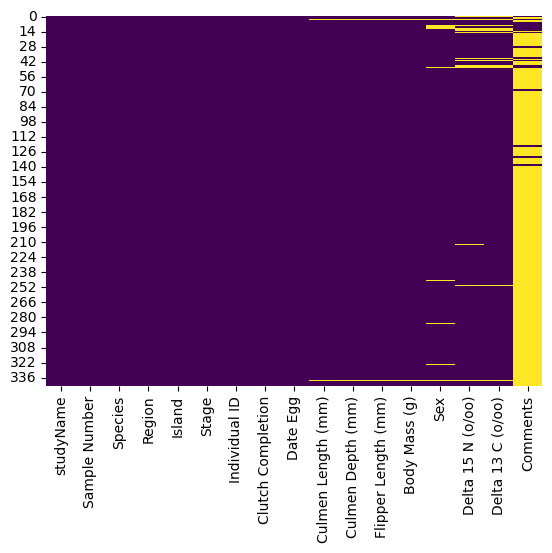

In [114]:
# for each row what data is missing
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

### Check duplicates

In [115]:
df[df.duplicated()] # in this case, no duplicate values

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments


In [116]:
for i in categoricalColList:
    print(i, "-- % Null", (df[i].shape[0] - df[i].notnull().sum()) / df[i].shape[0] * 100)
    print(df[i].value_counts())
    print("\n")

studyName -- % Null 0.0
studyName
PAL0910    120
PAL0809    114
PAL0708    110
Name: count, dtype: int64


Species -- % Null 0.0
Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64


Region -- % Null 0.0
Region
Anvers    344
Name: count, dtype: int64


Island -- % Null 0.0
Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


Stage -- % Null 0.0
Stage
Adult, 1 Egg Stage    344
Name: count, dtype: int64


Individual ID -- % Null 0.0
Individual ID
N61A2    3
N29A2    3
N22A1    3
N22A2    3
N23A1    3
        ..
N10A1    1
N10A2    1
N84A2    1
N84A1    1
N43A2    1
Name: count, Length: 190, dtype: int64


Clutch Completion -- % Null 0.0
Clutch Completion
Yes    308
No      36
Name: count, dtype: int64


Date Egg -- % Null 0.0
Date Egg
11/27/07    18
11/9/08     16
11/16/07    16
11/18/09    14
11/4/08     12
11/6/08     12
11/13

In [117]:
df['Sex'] = df['Sex'].replace({".": np.nan})

In [118]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

### Handling missing values

In [119]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [120]:
df.shape

(344, 17)

In [121]:
df_imp = df.drop(['Comments'], axis=1)
df_imp.shape

categoricalColList.remove('Comments')

In [122]:
df[df.isna().sum(axis=1) > 5]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_imp = df_imp.drop([3,339], axis=0)
df_imp.shape

(342, 16)

In [124]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_median = SimpleImputer(strategy='median', missing_values=np.nan)
imp_mode = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imp_constant = SimpleImputer(strategy='constant', missing_values=np.nan)
imp_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
imp_zero = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0)
imp_min = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=-1)
imp_max = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=1)
imp_25 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0.25)
imp_75 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0.75)
imp_50 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0.5)
imp_100 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=1.0)

In [125]:
df_num = pd.DataFrame(imp_median.fit_transform(df_imp[numericalColList]), columns=numericalColList)
df_cat = pd.DataFrame(imp_mode.fit_transform(df_imp[categoricalColList]), columns=categoricalColList)

In [126]:
df_cat.head()

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,MALE
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,FEMALE
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,FEMALE
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,FEMALE
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,MALE


In [127]:
df_num.isna().sum()

Sample Number          0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [128]:
df_cat.isna().sum()

studyName            0
Species              0
Region               0
Island               0
Stage                0
Individual ID        0
Clutch Completion    0
Date Egg             0
Sex                  0
dtype: int64

In [129]:
df_imp = pd.concat([df_num, df_cat], axis=1)

In [130]:
df_imp.shape

(342, 16)

In [131]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [132]:
df_imp.isna().sum()

Sample Number          0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
studyName              0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Sex                    0
dtype: int64

### Outliers

<Axes: >

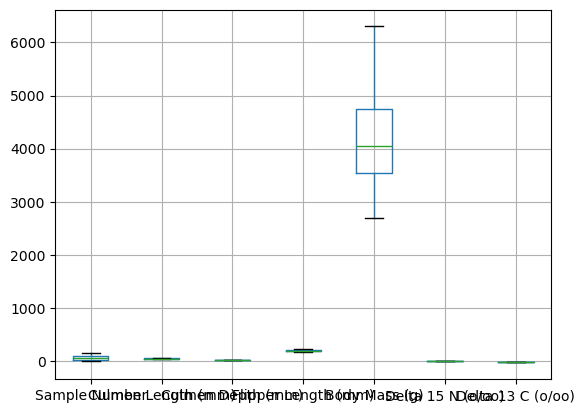

In [133]:
df.boxplot()

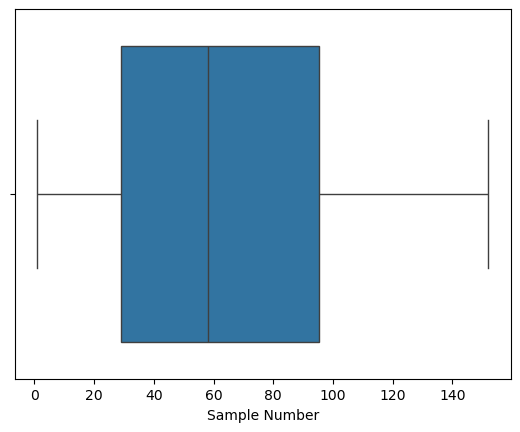

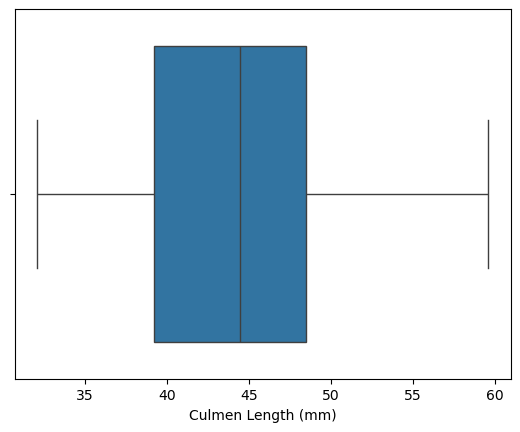

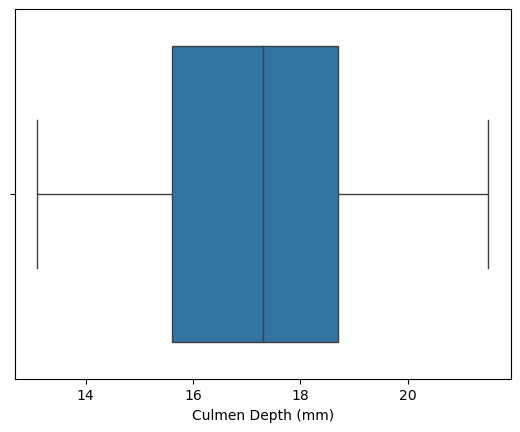

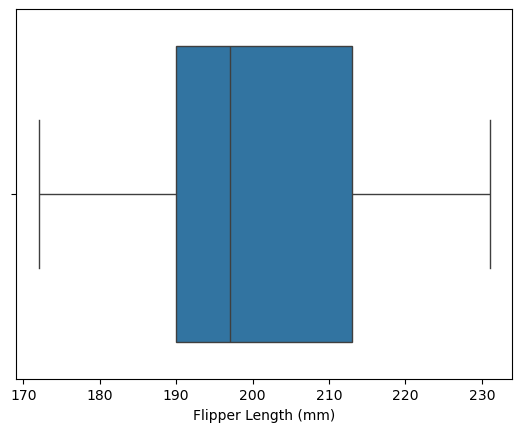

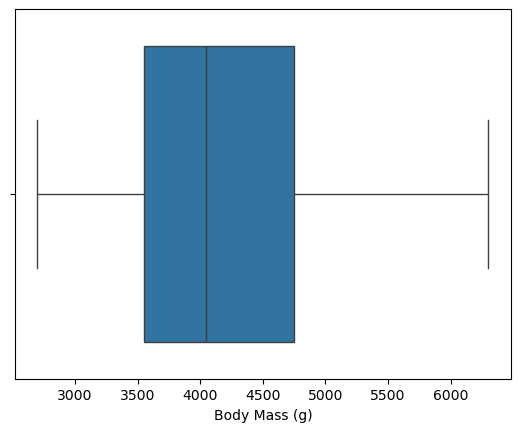

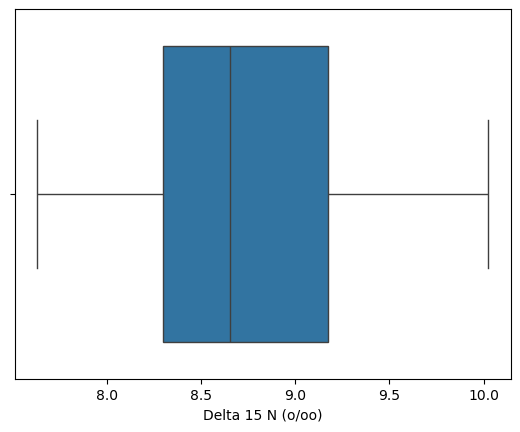

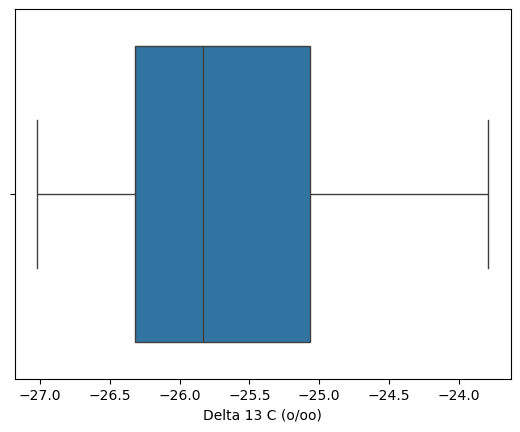

In [134]:
import seaborn as sns
for i in numericalColList:
    plt.figure()
    sns.boxplot(x=df[i])

In [135]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

In [136]:

outNum = []
for i in numericalColList:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outNum.append([i, q1, q3, iqr, lower_bound, upper_bound])
    df[i] = np.where(df[i] > upper_bound, upper_bound, np.where(df[i] < lower_bound, lower_bound, df[i]))

    # outNum.append(df[(df[i] < lower_bound) | (df[i] > upper_bound)].index)
    # df[i] = df[i].clip(lower_bound, upper_bound)
    # df[i] = np.log(df[i])

In [137]:
pd.DataFrame(outNum, columns=["variableName", "Q1", "Q3", "IQR", "lower_bound", " upper_bound"])

,variableName,Q1,Q3,IQR,lower_bound,upper_bound
0,Sample Number,29.000000,95.250000,66.250000,-70.375000,194.625000
1,Culmen Length (mm),39.225000,48.500000,9.275000,25.312500,62.412500
2,Culmen Depth (mm),15.600000,18.700000,3.100000,10.950000,23.350000
3,Flipper Length (mm),190.000000,213.000000,23.000000,155.500000,247.500000
4,Body Mass (g),3550.000000,4750.000000,1200.000000,1750.000000,6550.000000
5,Delta 15 N (o/oo),8.299890,9.172123,0.872232,6.991541,10.480471
6,Delta 13 C (o/oo),-26.320305,-25.062050,1.258255,-28.207687,-23.174668


## Encoding and Transforming variables

In [138]:
df_imp[categoricalColList]

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,MALE
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,FEMALE
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,FEMALE
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,FEMALE
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,MALE
...,...,...,...,...,...,...,...,...,...
337,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,FEMALE
338,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,FEMALE
339,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,MALE
340,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,FEMALE


In [139]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [140]:
for i in categoricalColList:
    print(i, df[i].nunique())

studyName 3
Species 3
Region 1
Island 3
Stage 1
Individual ID 190
Clutch Completion 2
Date Egg 50
Sex 2


In [141]:
le = LabelEncoder()
for col in ["Individual ID", "Date Egg"]:
    df_imp[col] = le.fit_transform(df_imp[col])

In [142]:
df_imp[categoricalColList]

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",22,Yes,3,MALE
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",23,Yes,3,FEMALE
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",44,Yes,15,FEMALE
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",66,Yes,15,FEMALE
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",67,Yes,15,MALE
...,...,...,...,...,...,...,...,...,...
337,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",62,No,48,FEMALE
338,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",64,Yes,28,FEMALE
339,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",65,Yes,28,MALE
340,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",74,Yes,28,FEMALE


In [144]:
df_imp.columns

Index(['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'studyName', 'Species', 'Region', 'Island',
       'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex'],
      dtype='object')

In [145]:
for i in ['studyName', 'Species', 'Region', 'Island', 'Stage', 'Clutch Completion', 'Sex']:
    y = pd.get_dummies(df_imp[i], prefix=i, drop_first=True)
    df_imp = pd.concat([df_imp, y], axis=1)

In [146]:
df_imp.head()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyName,Species,Region,...,Date Egg,Sex,studyName_PAL0809,studyName_PAL0910,Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,1.0,39.1,18.7,181.0,3750.0,8.652405,-25.83352,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,...,3,MALE,False,False,False,False,False,True,True,True
1,2.0,39.5,17.4,186.0,3800.0,8.949560,-24.69454,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,...,3,FEMALE,False,False,False,False,False,True,True,False
2,3.0,40.3,18.0,195.0,3250.0,8.368210,-25.33302,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,...,15,FEMALE,False,False,False,False,False,True,True,False
3,5.0,36.7,19.3,193.0,3450.0,8.766510,-25.32426,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,...,15,FEMALE,False,False,False,False,False,True,True,False
4,6.0,39.3,20.6,190.0,3650.0,8.664960,-25.29805,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,...,15,MALE,False,False,False,False,False,True,True,True


In [147]:
df_imp.columns

Index(['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'studyName', 'Species', 'Region', 'Island',
       'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex',
       'studyName_PAL0809', 'studyName_PAL0910',
       'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Island_Dream',
       'Island_Torgersen', 'Clutch Completion_Yes', 'Sex_MALE'],
      dtype='object')

In [148]:
colSubset = [i for i in df_imp.columns if 'Sex' in i]

In [149]:
df_imp[colSubset]

,Sex,Sex_MALE
0,MALE,True
1,FEMALE,False
2,FEMALE,False
3,FEMALE,False
4,MALE,True
...,...,...
337,FEMALE,False
338,FEMALE,False
339,MALE,True
340,FEMALE,False


In [150]:
df_imp = df_imp.drop(['studyName', 'Species', 'Region', 'Island', 'Stage', 'Clutch Completion', 'Sex'], axis=1)
df_imp.head()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Individual ID,Date Egg,studyName_PAL0809,studyName_PAL0910,Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,1.0,39.1,18.7,181.0,3750.0,8.652405,-25.83352,22,3,False,False,False,False,False,True,True,True
1,2.0,39.5,17.4,186.0,3800.0,8.949560,-24.69454,23,3,False,False,False,False,False,True,True,False
2,3.0,40.3,18.0,195.0,3250.0,8.368210,-25.33302,44,15,False,False,False,False,False,True,True,False
3,5.0,36.7,19.3,193.0,3450.0,8.766510,-25.32426,66,15,False,False,False,False,False,True,True,False
4,6.0,39.3,20.6,190.0,3650.0,8.664960,-25.29805,67,15,False,False,False,False,False,True,True,True


In [152]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
onehot = encoder.fit_transform(df)
print(onehot.shape)

(344, 1476)
